## Нейронные сети: зависимость ошибки и обучающей способности от числа нейронов

В этом задании вы будете настраивать двуслойную нейронную сеть для решения задачи многоклассовой классификации. Предлагается выполнить процедуры загрузки и разбиения входных данных, обучения сети и подсчета ошибки классификации. Предлагается определить оптимальное количество нейронов в скрытом слое сети. Нужно так подобрать число нейронов, чтобы модель была с одной стороны несложной, а с другой стороны давала бы достаточно точный прогноз и не переобучалась. Цель задания -- показать, как зависит точность и обучающая способность сети от ее сложности.

Для решения задачи многоклассовой классификации предлагается воспользоваться библиотекой построения нейронных сетей [pybrain](http://pybrain.org/). Библиотека содержит основные модули инициализации двуслойной нейронной сети прямого распространения, оценки ее параметров с помощью метода обратного распространения ошибки (backpropagation) и подсчета ошибки.

Установить библиотеку pybrain можно с помощью стандартной системы управления пакетами pip:

```
pip install pybrain
```
Кроме того, для установки библиотеки можно использовать и другие способы, приведенные в [документации](https://github.com/pybrain/pybrain/wiki/installation). 

###  Используемые данные

Рассматривается задача оценки качества вина по его физико-химическим свойствам [1]. Данные размещены в [открытом доступе](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в репозитории UCI  и содержат 1599 образцов красного вина, описанных 11 признаками, среди которых -- кислотность, процентное содержание сахара, алкоголя и пр. Кроме того, каждому объекту поставлена в соответствие оценка качества по шкале от 0 до 10. Требуется восстановить оценку качества вина по исходному признаковому описанию.

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.  In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 

In [1]:
# Выполним инициализацию основных используемых модулей
%matplotlib inline

import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import numpy as np

In [2]:
np.version.version

'1.12.1'

In [3]:
#import sklearn
#sklearn.__version__ 0.18.1

Выполним загрузку данных

In [4]:
with open('winequality-red.csv') as f:
    f.readline()  # пропуск заголовочной строки
    data = np.loadtxt(f, delimiter=';')

In [5]:
np.info(data)

class:  ndarray
shape:  (1599, 12)
strides:  (96, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2edbc00
byteorder:  little
byteswap:  False
type: float64


В качестве альтернативного варианта, можно выполнить загрузку данных напрямую из репозитория UCI, воспользовавшись библиотекой urllib.

In [6]:
import urllib
# URL for the Wine Quality Data Set (UCI Machine Learning Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# загрузка файла
f = urllib.urlopen(url)
f.readline()  # пропуск заголовочной строки
data = np.loadtxt(f, delimiter=';')

Выделим из данных целевую переменную. Классы в задаче являются несбалинсированными: основной доле объектов поставлена оценка качества от 5 до 7. Приведем задачу к трехклассовой: объектам с оценкой качества меньше пяти поставим оценку 5, а объектам с оценкой качества больше семи поставим 7. 

In [7]:
arr = np.arange(6).reshape(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [8]:
arr >2

array([[False, False, False],
       [ True,  True,  True]], dtype=bool)

In [9]:
np.place(arr, arr >2, [1,2])
arr

array([[0, 1, 2],
       [1, 2, 1]])

In [10]:
data[:,-1]

array([ 5.,  5.,  5., ...,  6.,  5.,  6.])

In [11]:
normalize(data[:,:-1])

array([[ 0.19515252,  0.01846037,  0.        , ...,  0.09256559,
         0.0147683 ,  0.24789644],
       [ 0.10724124,  0.01209901,  0.        , ...,  0.04399641,
         0.00934924,  0.134739  ],
       [ 0.13545665,  0.01319834,  0.00069465, ...,  0.05661393,
         0.01128805,  0.17018912],
       ..., 
       [ 0.12306863,  0.0099627 ,  0.00253951, ...,  0.06680869,
         0.01465103,  0.21488174],
       [ 0.10566885,  0.01155193,  0.0021492 , ...,  0.06393861,
         0.01271608,  0.18268174],
       [ 0.12589937,  0.0065048 ,  0.00986212, ...,  0.07113314,
         0.01384893,  0.2308155 ]])

In [12]:
TRAIN_SIZE = 0.7 # Разделение данных на обучающую и контрольную части в пропорции 70/30%
from sklearn.cross_validation import train_test_split

y = data[:, -1] # get last col
np.place(y, y < 5, 5) # replace values < 5 with 5
np.place(y, y > 7, 7) # replace val > 7 with 7
y -= min(y) # norm y to 0
X = data[:, :-1] # get data without last col
X = normalize(X) # standard normalization for all cols

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)

/home/sigor/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
arr_x = np.arange(0,10,1)
arr_y = np.arange(10,20,1)
ar_x_train, ar_x_test, ar_y_train, ar_y_test = train_test_split(arr_x,
                                arr_y, train_size=0.8, random_state=0) # not in this version, shuffle=False)

In [14]:
print arr_x, arr_y

[0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14 15 16 17 18 19]


In [15]:
print ar_x_train, ar_y_train

[4 9 1 6 7 3 0 5] [14 19 11 16 17 13 10 15]


### Двуслойная нейронная сеть

Двуслойная нейронная сеть представляет собой функцию распознавания, которая може быть записана в виде следующей суперпозиции:

$f(x,W)=h^{(2)}\left(\sum\limits_{i=1}^D w_i^{(2)}h^{(1)}\left(\sum\limits_{j=1}^n w_{ji}^{(1)}x_j+b_i^{(1)}\right)+b^{(2)}\right)$, где

$x$ -- исходный объект (сорт вина, описанный 11 признаками), $x_j$ -- соответствующий признак,

$n$ --  количество нейронов во входном слое сети, совпадающее с количеством признаков,

$D$ --  количество нейронов в скрытом слое сети,

$w_i^{(2)}, w_{ji}^{(1)}, b_i^{(1)}, b^{(2)}$ --  параметры сети, соответствующие весам нейронов,

$h^{(1)}, h^{(2)}$ -- функции активации.

В качестве функции активации на скрытом слое сети используется линейная функция. На выходном слое сети используется функция активации softmax, являющаяся обобщением сигмоидной функции на многоклассовый случай:

$y_k=\text{softmax}_k(a_1,...,a_k)=\frac{\exp(a_k)}{\sum_{k=1}^K\exp(a_k)}.$



### Настройка параметров сети

Оптимальные параметры сети $W_{opt}$ определяются путем минимизации функции ошибки:

$W_{opt}=\arg\min\limits_{W}L(W)+\lambda\|W\|^2$.

Здесь $L(W)$ является функцией ошибки многоклассовой классификации,

$L(W)=- \sum^N_{n=1}\sum^K_{k=1} t_{kn} log(y_{kn}),$

$t_{kn}$ -- бинарно закодированные метки классов, $K$ -- количество меток, $N$ -- количество объектов,

а $\lambda\|W\|^2$ является регуляризующим слагаемым, контролирующим суммарный вес параметров сети и предотвращающий эффект переобучения.

Оптимизация параметров выполняется методом обратного распространения ошибки (backpropagation).

Выполним загрузку основных модулей: ClassificationDataSet -- структура данных pybrain, buildNetwork -- инициализация нейронной сети, BackpropTrainer -- оптимизация параметров сети методом backpropagation, SoftmaxLayer -- функция softmax, соответствующая выходному слою сети, percentError -- функцию подсчета ошибки классификации (доля неправильных ответов). 

In [16]:
from pybrain.datasets import ClassificationDataSet # Структура данных pybrain
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.utilities import percentError

Инициализируем основные параметры задачи: HIDDEN_NEURONS_NUM -- количество нейронов скрытого слоя, MAX_EPOCHS -- максимальное количество итераций алгоритма оптимизации

In [17]:
# Определение основных констант
HIDDEN_NEURONS_NUM = 100 # Количество нейронов, содержащееся в скрытом слое сети
MAX_EPOCHS = 100 # Максимальное число итераций алгоритма оптимизации параметров сети

Инициализируем структуру данных ClassificationDataSet, используемую библиотекой pybrain. Для инициализации структура принимает два аргумента: количество признаков *np.shape(X)[1]* и количество различных меток классов *len(np.unique(y))*.

Кроме того, произведем бинаризацию целевой переменной с помощью функции *_convertToOneOfMany( )* и разбиение данных на обучающую и контрольную части.

In [18]:
# Конвертация данных в структуру ClassificationDataSet
# Обучающая часть
ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
# Первый аргумент -- количество признаков np.shape(X)[1], второй аргумент -- количество меток классов len(np.unique(y_train)))
ds_train.setField('input', X_train) # Инициализация объектов
ds_train.setField('target', y_train[:, np.newaxis]) # Инициализация ответов; np.newaxis создает вектор-столбец
ds_train._convertToOneOfMany( ) # Бинаризация вектора ответов
# Контрольная часть
ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
ds_test.setField('input', X_test)
ds_test.setField('target', y_test[:, np.newaxis])
ds_test._convertToOneOfMany( )

Инициализируем двуслойную сеть и произведем оптимизацию ее параметров. Аргументами для инициализации являются:

ds.indim -- количество нейронов на входном слое сети, совпадает с количеством признаков (в нашем случае 11),

HIDDEN_NEURONS_NUM -- количество нейронов в скрытом слое сети,

ds.outdim -- количество нейронов на выходном слое сети, совпадает с количеством различных меток классов (в нашем случае 3),

SoftmaxLayer -- функция softmax, используемая на выходном слое для решения задачи многоклассовой классификации.

In [19]:
np.random.seed(0) # Зафиксируем seed для получения воспроизводимого результата

# Построение сети прямого распространения (Feedforward network)
net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)
# ds.indim -- количество нейронов входного слоя, равне количеству признаков
# ds.outdim -- количество нейронов выходного слоя, равное количеству меток классов
# SoftmaxLayer -- функция активации, пригодная для решения задачи многоклассовой классификации

init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
net._setParameters(init_params)

 Выполним оптимизацию параметров сети. График ниже показывает сходимость функции ошибки на обучающей/контрольной части.

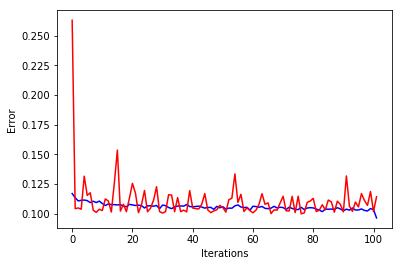

In [20]:
random.seed(0)
# Модуль настройки параметров pybrain использует модуль random; зафиксируем seed для получения воспроизводимого результата
trainer = BackpropTrainer(net, dataset=ds_train) # Инициализируем модуль оптимизации
err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
line_train = plt.plot(err_train, 'b', err_val, 'r') # Построение графика
xlab = plt.xlabel('Iterations')
ylab = plt.ylabel('Error')

Рассчитаем значение доли неправильных ответов на обучающей и контрольной выборке.

In [21]:
r = net.activateOnDataset(ds_train)
r

array([[ 0.71698327,  0.23708005,  0.04593669],
       [ 0.5706315 ,  0.34638599,  0.0829825 ],
       [ 0.35270478,  0.46740071,  0.17989451],
       ..., 
       [ 0.70330357,  0.24408666,  0.05260977],
       [ 0.58438621,  0.30943056,  0.10618323],
       [ 0.66775285,  0.27654151,  0.05570563]])

In [22]:
np.info(r)

class:  ndarray
shape:  (1119, 3)
strides:  (24, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x319b750
byteorder:  little
byteswap:  False
type: float64


In [23]:
r.argmax(axis=1) # get one-hot binary code

array([0, 0, 1, ..., 0, 0, 0])

In [24]:

res_train = net.activateOnDataset(ds_train).argmax(axis=1) # Подсчет результата на обучающей выборке
print 'Error on train: ', percentError(res_train, ds_train['target'].argmax(axis=1)), '%' # Подсчет ошибки
res_test = net.activateOnDataset(ds_test).argmax(axis=1) # Подсчет результата на тестовой выборке
print 'Error on test: ', percentError(res_test, ds_test['target'].argmax(axis=1)), '%' # Подсчет ошибки

Error on train:  49.0616621984 %
Error on test:  46.0416666667 %


In [25]:
print net

FeedForwardNetwork-8
   Modules:
    [<BiasUnit 'bias'>, <LinearLayer 'in'>, <SigmoidLayer 'hidden0'>, <SoftmaxLayer 'out'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'in' -> 'hidden0'>, <FullConnection 'FullConnection-5': 'hidden0' -> 'out'>, <FullConnection 'FullConnection-6': 'bias' -> 'out'>, <FullConnection 'FullConnection-7': 'bias' -> 'hidden0'>]



In [26]:
res_train

array([0, 0, 1, ..., 0, 0, 0])

In [27]:
res_test

array([0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1,

### Задание. Определение оптимального числа нейронов.
В задании требуется исследовать зависимость ошибки на контрольной выборке в зависимости от числа нейронов в скрытом слое сети. Количество нейронов, по которому предполагается провести перебор, записано в векторе 
```
hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
```

1. (При)Для фиксированного разбиения на обучающую и контрольную части подсчитайте долю неправильных ответов (ошибок) классификации на обучении/контроле в зависимости от количества нейронов в скрытом слое сети. Запишите результаты в массивы ```res_train_vec``` и ```res_test_vec```, соответственно. С помощью функции ```plot_classification_error``` постройте график зависимости ошибок на обучении/контроле от количества нейронов. Являются ли графики ошибок возрастающими/убывающими? При каком количестве нейронов достигается минимум ошибок классификации?

2. С помощью функции ```write_answer_nn``` запишите в выходной файл число: количество нейронов в скрытом слое сети, для которого достигается минимум ошибки классификации на контрольной выборке.

Error on train:  49.9553172475 %
Error on test:  46.25 %
Error on train:  49.0616621984 %
Error on test:  46.0416666667 %
Error on train:  49.4191242181 %
Error on test:  45.8333333333 %
Error on train:  50.8489722967 %
Error on test:  50.8333333333 %
Error on train:  49.6872207328 %
Error on test:  47.7083333333 %
Error on train:  49.0616621984 %
Error on test:  45.625 %


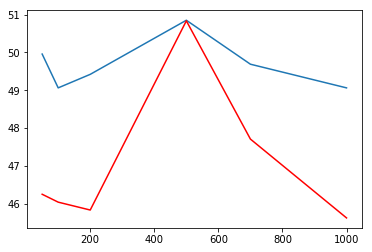

In [43]:
random.seed(0) # Зафиксируем seed для получния воспроизводимого результата
np.random.seed(0)

def plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec):
# hidden_neurons_num -- массив размера h, содержащий количество нейронов, по которому предполагается провести перебор,
#   hidden_neurons_num = [50, 100, 200, 500, 700, 1000];
# res_train_vec -- массив размера h, содержащий значения доли неправильных ответов классификации на обучении;
# res_train_vec -- массив размера h, содержащий значения доли неправильных ответов классификации на контроле
    plt.figure()
    plt.plot(hidden_neurons_num, res_train_vec)
    plt.plot(hidden_neurons_num, res_test_vec, '-r')

def write_answer_nn(optimal_neurons_num):
    with open("nnets_answer1.txt", "w") as fout:
        fout.write(str(optimal_neurons_num))

hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
#hidden_neurons_num = [50, 100, 200]
res_train_vec = list()
res_test_vec = list()

for nnum in hidden_neurons_num:
    # Put your code here
    # Не забудьте про инициализацию весов командой np.random.random((len(net.params)))
    random.seed(0) # Зафиксируем seed для получния воспроизводимого результата
    np.random.seed(0)

    net = buildNetwork(ds_train.indim, nnum, ds_train.outdim, outclass=SoftmaxLayer)

    init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
    net._setParameters(init_params)

    trainer = BackpropTrainer(net, dataset=ds_train) # Инициализируем модуль оптимизации
    
    # обучение модели
    err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
    #err_train, err_val = trainer.trainUntilConvergence(maxEpochs=200)
        
    # эксплуатация модели
    res_train = net.activateOnDataset(ds_train).argmax(axis=1) # Подсчет результата на обучающей выборке
    err_train = percentError(res_train, ds_train['target'].argmax(axis=1)) # Подсчет ошибки
    print 'Error on train: ', err_train, '%'
    
    res_test = net.activateOnDataset(ds_test).argmax(axis=1) # Подсчет результата на тестовой выборке
    err_test = percentError(res_test, ds_test['target'].argmax(axis=1)) # Подсчет ошибки
    print 'Error on test: ', err_test, '%'
    
    res_train_vec.append(err_train)
    res_test_vec.append(err_test)
    
# Постройте график зависимости ошибок на обучении и контроле в зависимости от количества нейронов
plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec)          
#  Запишите в файл количество нейронов, при котором достигается минимум ошибки на контроле
write_answer_nn(hidden_neurons_num[res_test_vec.index(min(res_test_vec))]) 


In [33]:
print hidden_neurons_num, res_train_vec, res_test_vec

[50, 100, 200, 500, 700, 1000] [49.955317247542446, 49.597855227882036, 48.972296693476316, 51.117068811438784, 49.597855227882036, 49.151027703306525] [46.25, 46.458333333333336, 45.625, 51.666666666666664, 48.125, 45.416666666666664]


epoch=100
Error on train:  49.9553172475 %
Error on test:  46.25 %
Error on train:  49.4191242181 %
Error on test:  47.2916666667 %
Error on train:  49.3297587131 %
Error on test:  45.625 %
Error on train:  51.4745308311 %
Error on test:  52.0833333333 %
Error on train:  49.508489723 %
Error on test:  48.3333333333 %
Error on train:  49.3297587131 %
Error on test:  45.625 %

Error on train:  49.9553172475 %
Error on test:  46.25 %
Error on train:  49.5978552279 %
Error on test:  46.4583333333 %
Error on train:  48.9722966935 %
Error on test:  45.625 %
Error on train:  51.1170688114 %
Error on test:  51.6666666667 %
Error on train:  49.5978552279 %
Error on test:  48.125 %
Error on train:  49.1510277033 %
Error on test:  45.4166666667 %

epoch=10
Error on train:  54.4235924933 %
Error on test:  51.25 %
Error on train:  53.3512064343 %
Error on test:  50.0 %
Error on train:  53.0831099196 %
Error on test:  52.0833333333 %
Error on train:  53.4405719392 %
Error on test:  52.7083333333 %
Error on train:  53.6193029491 %
Error on test:  49.7916666667 %
Error on train:  53.9767649687 %
Error on test:  50.625 %

epoch=20
Error on train:  49.4191242181 %
Error on test:  49.375 %
Error on train:  53.3512064343 %
Error on test:  50.0 %
Error on train:  53.0831099196 %
Error on test:  52.0833333333 %
Error on train:  54.0661304736 %
Error on test:  53.3333333333 %
Error on train:  53.6193029491 %
Error on test:  49.7916666667 %
Error on train:  53.9767649687 %
Error on test:  50.625 %

epoch=30
Error on train:  49.3297587131 %
Error on test:  48.75 %
Error on train:  51.563896336 %
Error on test:  51.0416666667 %
Error on train:  49.2403932082 %
Error on test:  46.25 %
Error on train:  51.1170688114 %
Error on test:  50.0 %
Error on train:  50.6702412869 %
Error on test:  48.3333333333 %
Error on train:  52.2788203753 %
Error on test:  50.2083333333 %

epoch=110
Error on train:  50.6702412869 %
Error on test:  48.3333333333 %
Error on train:  50.0446827525 %
Error on test:  45.4166666667 %
Error on train:  48.9722966935 %
Error on test:  44.5833333333 %
Error on train:  51.4745308311 %
Error on test:  52.0833333333 %
Error on train:  49.508489723 %
Error on test:  48.3333333333 %
Error on train:  49.3297587131 %

epoch=150
Error on train:  50.6702412869 %
Error on test:  46.875 %
Error on train:  49.1510277033 %
Error on test:  43.9583333333 %
Error on train:  49.3297587131 %
Error on test:  45.4166666667 %
Error on train:  47.363717605 %
Error on test:  43.9583333333 %
Error on train:  49.0616621984 %
Error on test:  46.6666666667 %
Error on train:  49.2403932082 %
Error on test:  48.9583333333 %

epoch=200
Error on train:  48.1680071492 %
Error on test:  45.8333333333 %
Error on train:  47.1849865952 %
Error on test:  43.3333333333 %
Error on train:  46.3806970509 %
Error on test:  43.75 %
Error on train:  46.0232350313 %
Error on test:  46.0416666667 %
Error on train:  47.2743521001 %
Error on test:  45.8333333333 %
Error on train:  48.2573726542 %
Error on test:  48.75 %